In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import string
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load the dataset
df= pd.read_csv('/Users/meme/Desktop/archive (5)/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
print(df.columns)

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


DATA PREPROCESSING

In [4]:
# Check for missing values
print(df.isnull().sum())

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [5]:
# Get column data types
print(df.dtypes)

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object


Handle Missing Data

In [6]:

# Assuming 'zomato' is your DataFrame
# Step 1: Filter out rows where 'rate' is 'NEW' or '-'
zomato = df[~df['rate'].isin(['NEW', '-'])].reset_index(drop=True)

In [7]:
# Step 2: Remove '/5' from the 'rate' column and convert to float
zomato['rate'] = zomato['rate'].str.replace('/5', '', regex=False).str.strip()

In [8]:
# Step 3: Convert 'rate' to numeric, coerce any non-numeric values to NaN
zomato['rate'] = pd.to_numeric(zomato['rate'], errors='coerce')


In [9]:
# Step 4: Handle NaN values by filling with the median (or another strategy)
zomato['rate'].fillna(zomato['rate'].median(), inplace=True)

In [10]:
# Optionally, print the first few rows of the cleaned DataFrame
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Remove or Handle Duplicates

In [11]:
# Check for duplicates and remove them
zomato = zomato.drop_duplicates()

In [12]:
#Deleting Unnnecessary Columns
Zomato=zomato.drop(['url','dish_liked','phone'],axis=1)

In [13]:
Zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [14]:
# Output: Number of NaN values per column
Zomato.isnull().sum()

address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      225
cuisines                        45
approx_cost(for two people)    341
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [15]:
# Removes rows with any NaN values and modifies the DataFrame in place
Zomato.dropna(how='any', inplace=True)

In [16]:
#Verification
Zomato.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [17]:
#rename columns
Zomato.rename(columns={
    'approx_cost(for two people)': 'cost',
    'listed_in(type)': 'type',
    'listed_in(city)': 'city'
}, inplace=True)

In [18]:
# Print the columns to verify renaming
print(Zomato.columns)

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')


In [19]:
# Convert 'votes' to integer
Zomato['votes'] = Zomato['votes'].astype(int)

In [20]:
# Convert categorical columns
Zomato['rest_type'] = Zomato['rest_type'].astype('category')
Zomato['cuisines'] = Zomato['cuisines'].astype('category')

In [21]:
#boxplot or IQR method to identify outliers
Q1 = Zomato['rate'].quantile(0.25)
Q3 = Zomato['rate'].quantile(0.75)
IQR = Q3 - Q1
outliers= Zomato[(Zomato['rate'] >= (Q1 - 1.5 * IQR)) & (Zomato['rate'] <= (Q3 + 1.5 * IQR))]

In [22]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

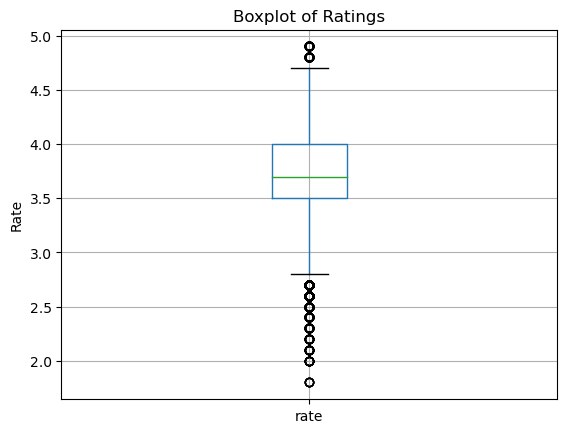

In [23]:
# Create a boxplot
Zomato.boxplot(column=['rate'])
plt.title('Boxplot of Ratings')
plt.ylabel('Rate')
plt.show()

In [24]:
#handling outliers
# Or capping values
Zomato['rate'] = np.where(Zomato['rate'] < lower_bound, lower_bound, Zomato['rate'])
Zomato['rate'] = np.where(Zomato['rate'] > upper_bound, upper_bound, Zomato['rate'])


In [25]:
print(Zomato.dtypes)

address           object
name              object
online_order      object
book_table        object
rate             float64
votes              int64
location          object
rest_type       category
cuisines        category
cost              object
reviews_list      object
menu_item         object
type              object
city              object
dtype: object


In [26]:
Zomato['cost'] = pd.to_numeric(Zomato['cost'], errors='coerce')

In [27]:
#Verifiction
print(Zomato.dtypes)

address           object
name              object
online_order      object
book_table        object
rate             float64
votes              int64
location          object
rest_type       category
cuisines        category
cost             float64
reviews_list      object
menu_item         object
type              object
city              object
dtype: object


In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/meme/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
# Lower Casing
Zomato['reviews_list'] = Zomato['reviews_list'].str.lower()

# Removal of Punctuation
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """Removes punctuation from the text."""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# Apply punctuation removal
Zomato['reviews_list'] = Zomato['reviews_list'].apply(remove_punctuation)

# Removal of Stopwords
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    """Removes stopwords from the text."""
    return ' '.join([word for word in text.split() if word not in STOPWORDS])

# Apply stopwords removal
Zomato['reviews_list'] = Zomato['reviews_list'].apply(remove_stopwords)

# Removal of URLs
def remove_urls(text):
    """Removes URLs from the text."""
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

# Apply URL removal
Zomato['reviews_list'] = Zomato['reviews_list'].apply(remove_urls)


In [ ]:
# Sample cleaned data
Zomato[['reviews_list', 'cuisines']]

,reviews_list,cuisines
0,rated 40 ratedn beautiful place dine inthe int...,"North Indian, Mughlai, Chinese"
1,rated 40 ratedn dinner family turned good choo...,"Chinese, North Indian, Thai"
2,rated 30 ratedn ambience good enough pocket fr...,"Cafe, Mexican, Italian"
3,rated 40 ratedn great food proper karnataka st...,"South Indian, North Indian"
4,rated 40 ratedn good restaurant neighbourhood ...,"North Indian, Rajasthani"
...,...,...
49435,rated 50 ratedn food service incomparably exce...,Continental
49436,,Finger Food
49437,,Finger Food
49438,rated 40 ratedn nice friendly place staff awes...,Finger Food


In [ ]:
#save the preprocessed data to a new file 
Zomato.to_csv('zomato_preprocessed.csv', index=False)


MACHINE LEARNING MODEL:  Content-Based Filtering Approach

In [30]:
Clean_data=pd.read_csv('zomato_preprocessed.csv')
Clean_data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,rated 40 ratedn beautiful place dine inthe int...,[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,rated 40 ratedn dinner family turned good choo...,[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,rated 30 ratedn ambience good enough pocket fr...,[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,rated 40 ratedn great food proper karnataka st...,[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,rated 40 ratedn good restaurant neighbourhood ...,[],Buffet,Banashankari


In [31]:
data=Clean_data.drop(['address','rest_type', 'type', 'menu_item', 'votes'],axis=1)
# Randomly sample
# Assuming df is your DataFrame
df_sampled = data.sample(frac=0.6, random_state=42)  # Random state is a seed value for reproducibility

# Display the first few rows of the sampled DataFrame to verify
print(df_sampled.head())

                name online_order book_table  rate      location  \
19625      LayerBite          Yes         No   3.8           BTM   
8473     Tawa Sagara          Yes         No   3.8     Jayanagar   
37154     Polar Bear          Yes         No   3.9   Rajajinagar   
43736  Cream & Fudge          Yes         No   3.3  Malleshwaram   
24745      Turf's Up           No         No   3.7    HBR Layout   

                                       cuisines   cost  \
19625               Bakery, Desserts, Beverages  450.0   
8473                       Mangalorean, Seafood  700.0   
37154  Desserts, Ice Cream, Beverages, Sandwich  400.0   
43736                       Ice Cream, Desserts  250.0   
24745                                 Fast Food  300.0   

                                            reviews_list          city  
19625  rated 50 ratedn love good pastry layerbite abs...     Jayanagar  
8473   rated 10 ratedn orders chicken sukka bad fresh...           BTM  
37154  rated 30 ratedn 

In [56]:
df_sampled.tail()

,name,online_order,book_table,rate,location,cuisines,cost,reviews_list,city
13031,Hot & Cool,No,No,3.7,Electronic City,Fast Food,150.0,,Electronic City
807,Godumana Moddha Hotel,No,No,3.7,Mysore Road,Biryani,250.0,,Banashankari
32774,The Paratha Company,Yes,No,4.3,Koramangala 4th Block,North Indian,400.0,rated 30 ratedn lunch hungry decided eat light...,Koramangala 7th Block
22290,Udupi Thadka,No,No,3.7,BTM,"South Indian, Chinese, North Indian",250.0,rated 30 ratedn good place catch quick snacks ...,JP Nagar
11702,Krispy Kreme,Yes,No,4.0,Richmond Road,"Desserts, Beverages",300.0,rated 50 ratedn favourite doughnut place hands...,Church Street


In [33]:
df_sampled['reviews_list'].fillna('', inplace=True)

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0.0, stop_words='english')

# Fit the model and transform the data into a TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(df_sampled['reviews_list'])

# Compute cosine similarity matrix from the TF-IDF matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Check the shape of the cosine similarity matrix
print(cosine_sim.shape)

(29327, 29327)


In [34]:
print(df_sampled.columns)  # Print column names to verify if 'name' exists


Index(['name', 'online_order', 'book_table', 'rate', 'location', 'cuisines',
       'cost', 'reviews_list', 'city'],
      dtype='object')


In [36]:
# Check the shapes of both
print(f"df_sampled shape: {df_sampled.shape}")
print(f"cosine_sim shape: {cosine_sim.shape}")


df_sampled shape: (29327, 9)
cosine_sim shape: (29327, 29327)


In [50]:
def recommend_restaurants(restaurant_name, cosine_sim=cosine_sim, df=df_sampled):
    idx = df.index[df['name'] == restaurant_name][0]  # Get the index of the restaurant
    sim_scores = list(enumerate(cosine_sim[idx]))  # Get similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]  # Top 10 similar
    restaurant_indices = [i[0] for i in sim_scores]
    return df.iloc[restaurant_indices][['name', 'cuisines', 'location', 'rate']]


In [53]:
# Example: Recommend restaurants similar to Polar Bear
recommendations = recommend_restaurants('LayerBite')
recommendations

,name,cuisines,location,rate
48671,NYS Kitchen,"North Indian, Chinese",Whitefield,3.6
38472,Spice Affair,"North Indian, Chinese",Marathahalli,3.6
47900,Corprate Biriyani Adda,"North Indian, Chinese",Whitefield,3.0
48445,Corprate Biriyani Adda,"North Indian, Chinese",Whitefield,3.0
37657,The Duke Of Juices,Beverages,Yeshwantpur,3.3
33810,Queen Pearls,Pizza,Ejipura,3.6
34047,Box of Biryani,"Biryani, North Indian, Kebab",Koramangala 6th Block,3.5
44162,Hotel Durga Shree Grand,"South Indian, North Indian, Chinese, Street Food",Rajajinagar,3.6
39648,Red Chilli,"Chinese, Thai",Brookefield,3.0
38682,Red Chilli,"Chinese, Thai",Brookefield,3.0


In [54]:
# Example: Recommend restaurants similar to Polar Bear
recommendations = recommend_restaurants('Tawa Sagara')
recommendations

,name,cuisines,location,rate
8473,Tawa Sagara,"Mangalorean, Seafood",Jayanagar,3.8
37154,Polar Bear,"Desserts, Ice Cream, Beverages, Sandwich",Rajajinagar,3.9
43736,Cream & Fudge,"Ice Cream, Desserts",Malleshwaram,3.3
24745,Turf's Up,Fast Food,HBR Layout,3.7
43722,Robin Brown Ice Creams,"Ice Cream, Fast Food",Rajajinagar,3.5
10676,Dry Dock Cafe,"Street Food, Tea",Koramangala 5th Block,3.6
43720,Pulimunchi,"Mangalorean, Seafood",Sadashiv Nagar,4.1
29934,Multi Kitchen,"North Indian, Chinese",BTM,3.7
28964,#L-81 Cafe,"Fast Food, Beverages",HSR,3.9
9620,Two Friends Cauldron,"Continental, Italian, American",JP Nagar,4.1


In [57]:
# Example: Recommend restaurants similar to Polar Bear
recommendations = recommend_restaurants('Udupi Thadka')
recommendations

,name,cuisines,location,rate
9830,Flavour of China,Chinese,BTM,3.8
21391,Flavour of China,Chinese,BTM,3.8
8748,Flavour of China,Chinese,BTM,3.8
28376,Flavour of China,Chinese,BTM,3.8
31134,Flavour of China,Chinese,BTM,3.8
22236,Flavour of China,Chinese,BTM,3.8
1394,Flavour of China,Chinese,BTM,3.8
33676,Flavour of China,Chinese,BTM,3.8
16017,Cinnamon,"North Indian, Chinese, Biryani",HSR,3.9
1850,Kabab Treat,"North Indian, Chinese",Bannerghatta Road,2.8
